# A4 Neural Network Classifier, or *Fun With Handwritten Digits*!

## Requirement 1

For this assignment, you will be adding code to the python script file `neuralnetworksA4.py` that you will [download from here](https://www.cs.colostate.edu/~anderson/cs545/notebooks/neuralnetworksA4.zip). The file `neuralnetworksA4_initial.py` currently contains the implementation of the `NeuralNetwork` class that is a solution to A3. It also contains an incomplete implementation of the subclass `NeuralNetworkClassifier` that extends `NeuralNetwork` as discussed in class.  Copy or rename this file to `neuralnetworksA4.py` and complete the implementation of `NeuralNetworkClassifier`. Your `NeuralNetworkClassifier` implementation should rely on inheriting functions from `NeuralNetwork` as much as possible. Your `neuralnetworksA4.py` file (notice it is plural) will now contain two classes, `NeuralNetwork` and `NeuralNetworkClassifier`.  The tar file `neuralnetworksA4.tar` also contains `optimizers.py`, the version of our optimizer code that you must use in this assignment.

In `NeuralNetworkClassifier` you will replace the `_error_f` function with one called `_neg_log_likelihood_f`. You will also have to define a new version of the `_gradient_f` function for `NeuralNetworkClassifier`.

Here are some example tests.

In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import numpy as np
import matplotlib.pyplot as plt

Import your completed `neuralnetworksA4.py` code that defines `NeuralNetwork` and `NeuralNetworkClassifier` classes.

In [134]:
import neuralnetworksA4 as nn

In [35]:
X = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
T = np.array([[0], [1], [1], [0]])
X, T

(array([[0, 0],
        [1, 0],
        [0, 1],
        [1, 1]]),
 array([[0],
        [1],
        [1],
        [0]]))

In [36]:
np.random.seed(111)
nnet = nn.NeuralNetworkClassifier(2, [10], 2)

In [37]:
print(nnet)

NeuralNetworkClassifier with 1 hidden layers.


In [38]:
nnet.Ws

[array([[ 0.12952296, -0.38212533, -0.07383268,  0.31091752, -0.23633798,
         -0.40511172, -0.55139454, -0.09211682, -0.30174387, -0.18745848],
        [ 0.56662595, -0.3028474 , -0.48359706,  0.19583749,  0.13999926,
         -0.26066957, -0.03900416, -0.44067096, -0.49195143,  0.46277416],
        [ 0.33943873,  0.39325596,  0.36397022,  0.56690583,  0.08922813,
          0.36230683, -0.09085429, -0.5456561 , -0.05295844, -0.45573018]]),
 array([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]])]

The `_error_f` function is replaced with `_neg_log_likelihood`.  If you add some print statements in `_neg_log_likelihood` functions, you can compare your output to the following results.

In [39]:
nnet.set_debug(True)

Debugging information will now be printed.


In [40]:
nnet.train(X, T, X, T, n_epochs=1, method='sgd', learning_rate=0.01)

in _backpropagate: first delta calculated is
[[-1.  0.]
 [ 0. -1.]
 [ 0. -1.]
 [-1.  0.]]
in _backpropagate: next delta is
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
in _backpropagate: next delta is
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
SGD: Epoch 1 Likelihood = Train 0.50012 Validate 0.50012


NeuralNetworkClassifier(2, [10], 2)

In [41]:
print(nnet)

NeuralNetworkClassifier with 1 hidden layers.


Now if you turn off debugging, most print statements will be suppressed so you can run for more epochs without tons of output.

In [42]:
nnet.set_debug(False)

No debugging information will be printed.


The `use()` function returns two `numpy` arrays. The first one is the class predictions for each sample, containing values from the set of unique values in `T` passed into the `train()` function.

The second value are the probabilities of each class for each sample. This should contain a column for each unique value in `T`.

In [43]:
nnet.use(X)

(array([[0],
        [0],
        [1],
        [1]]),
 array([[0.50112497, 0.49887503],
        [0.50052104, 0.49947896],
        [0.49970609, 0.50029391],
        [0.49958358, 0.50041642]]))

In [44]:
def percent_correct(Y, T):
    return np.mean(T == Y) * 100

In [45]:
percent_correct(nnet.use(X)[0], T)

np.float64(50.0)

The XOR problem was used early in the history of neural networks as a problem that cannot be solved with a linear model.  Let's try it.  

In [46]:
nnet = nn.NeuralNetworkClassifier(2, [], 2)     # [], so no hidden layers, just a linear model
nnet.train(X, T, X, T, 100, method='sgd', learning_rate=0.1)

SGD: Epoch 10 Likelihood = Train 0.50000 Validate 0.50000
SGD: Epoch 20 Likelihood = Train 0.50000 Validate 0.50000
SGD: Epoch 30 Likelihood = Train 0.50000 Validate 0.50000
SGD: Epoch 40 Likelihood = Train 0.50000 Validate 0.50000
SGD: Epoch 50 Likelihood = Train 0.50000 Validate 0.50000
SGD: Epoch 60 Likelihood = Train 0.50000 Validate 0.50000
SGD: Epoch 70 Likelihood = Train 0.50000 Validate 0.50000
SGD: Epoch 80 Likelihood = Train 0.50000 Validate 0.50000
SGD: Epoch 90 Likelihood = Train 0.50000 Validate 0.50000
SGD: Epoch 100 Likelihood = Train 0.50000 Validate 0.50000


NeuralNetworkClassifier(2, [], 2)

In [47]:
print(nnet)

NeuralNetworkClassifier with 0 hidden layers.


In [48]:
nnet.use(X)

(array([[0],
        [0],
        [0],
        [0]]),
 array([[0.5, 0.5],
        [0.5, 0.5],
        [0.5, 0.5],
        [0.5, 0.5]]))

In [49]:
percent_correct(nnet.use(X)[0], T)

np.float64(50.0)

Now try with one hidden layer containing one unit.

In [50]:
nnet = nn.NeuralNetworkClassifier(2, [1], 2)  
nnet.train(X, T, X, T, 100, method='adamw', learning_rate=0.1)

AdamW: Epoch 10 Likelihood = Train 0.49994 Validate 0.49994
AdamW: Epoch 20 Likelihood = Train 0.50062 Validate 0.50062
AdamW: Epoch 30 Likelihood = Train 0.50053 Validate 0.50053
AdamW: Epoch 40 Likelihood = Train 0.50657 Validate 0.50657
AdamW: Epoch 50 Likelihood = Train 0.54425 Validate 0.54425
AdamW: Epoch 60 Likelihood = Train 0.56473 Validate 0.56473
AdamW: Epoch 70 Likelihood = Train 0.56392 Validate 0.56392
AdamW: Epoch 80 Likelihood = Train 0.56642 Validate 0.56642
AdamW: Epoch 90 Likelihood = Train 0.56592 Validate 0.56592
AdamW: Epoch 100 Likelihood = Train 0.56665 Validate 0.56665


NeuralNetworkClassifier(2, [1], 2)

In [51]:
Y, probs = nnet.use(X)
print(Y)
percent_correct(Y, T)

[[0]
 [0]
 [1]
 [0]]


np.float64(75.0)

One hidden unit didn't work.  Let's try five hidden units.

In [52]:
nnet = nn.NeuralNetworkClassifier(2, [5], 2)  
nnet.train(X, T, X, T, 400, method='adamw')

AdamW: Epoch 40 Likelihood = Train 0.75057 Validate 0.75057
AdamW: Epoch 80 Likelihood = Train 0.73368 Validate 0.73368
AdamW: Epoch 120 Likelihood = Train 0.73093 Validate 0.73093
AdamW: Epoch 160 Likelihood = Train 0.73106 Validate 0.73106
AdamW: Epoch 200 Likelihood = Train 0.73105 Validate 0.73105
AdamW: Epoch 240 Likelihood = Train 0.73106 Validate 0.73106
AdamW: Epoch 280 Likelihood = Train 0.73106 Validate 0.73106
AdamW: Epoch 320 Likelihood = Train 0.73106 Validate 0.73106
AdamW: Epoch 360 Likelihood = Train 0.73106 Validate 0.73106
AdamW: Epoch 400 Likelihood = Train 0.73106 Validate 0.73106


NeuralNetworkClassifier(2, [5], 2)

In [53]:
print(nnet)

NeuralNetworkClassifier with 1 hidden layers.


In [54]:
Y, probs = nnet.use(X)
print(Y)
percent_correct(Y, T)

[[0]
 [1]
 [1]
 [0]]


np.float64(100.0)

A second way to evaluate a classifier is to calculate a confusion matrix. This shows the percent accuracy for each class, and also shows which classes are predicted in error.

Here is a function you can use to show a confusion matrix.

In [55]:
import pandas

def confusion_matrix(Y_classes, T):
    class_names = np.unique(T)
    table = []
    for true_class in class_names:
        row = []
        for Y_class in class_names:
            row.append(100 * np.mean(Y_classes[T == true_class] == Y_class))
        table.append(row)
    conf_matrix = pandas.DataFrame(table, index=class_names, columns=class_names)
    print('Percent Correct')
    return conf_matrix.style.background_gradient(cmap='Blues').format("{:.1f}")

In [56]:
nnet.best_epoch

20

In [57]:
nnet.use(X)

(array([[0],
        [1],
        [1],
        [0]]),
 array([[0.79991856, 0.20008144],
        [0.22092247, 0.77907753],
        [0.18149944, 0.81850056],
        [0.79964617, 0.20035383]]))

In [58]:
confusion_matrix(nnet.use(X)[0], T)

Percent Correct


,0,1
0,100.0,0.0
1,0.0,100.0


In [59]:
for method in ('sgd', 'adamw', 'scg'):
    nnet = nn.NeuralNetworkClassifier(2, [20, 20], 2)  
    nnet.train(X, T, X, T, 400, method=method, learning_rate=0.1, momentum=0.9, verbose=False)
    pc = percent_correct(nnet.use(X)[0], T)
    print(f'{method} % Correct: {pc:.0f}')

sgd % Correct: 100
adamw % Correct: 100
scg % Correct: 100


# Apply `NeuralNetworkClassifier` to Handwritten Digits

Apply your `NeuralNetworkClassifier` to the [MNIST digits dataset](https://figshare.com/articles/dataset/mnist_pkl_gz/13303457/1).

First, make sure your solution works on the following examples. Then complete `make_mnist_classifier` and use it as instructed below.

In [60]:
import pickle
import gzip

In [61]:
with gzip.open('mnist.pkl.gz', 'rb') as f:
    train_set, valid_set, test_set = pickle.load(f, encoding='latin1')

Xtrain = train_set[0]
Ttrain = train_set[1].reshape(-1, 1)

Xval = valid_set[0]
Tval = valid_set[1].reshape(-1, 1)

Xtest = test_set[0]
Ttest = test_set[1].reshape(-1, 1)

print(Xtrain.shape, Ttrain.shape,  Xval.shape, Tval.shape,  Xtest.shape, Ttest.shape)

(50000, 784) (50000, 1) (10000, 784) (10000, 1) (10000, 784) (10000, 1)


In [62]:
28*28

784

In [63]:
def draw_digit(image, label, predicted_label=None):
    plt.imshow(-image.reshape(28, 28), cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    title = str(label)
    color = 'black'
    if predicted_label is not None:
        title += ' as {}'.format(predicted_label)
        if predicted_label != label:
            color = 'red'
    plt.title(title, color=color)

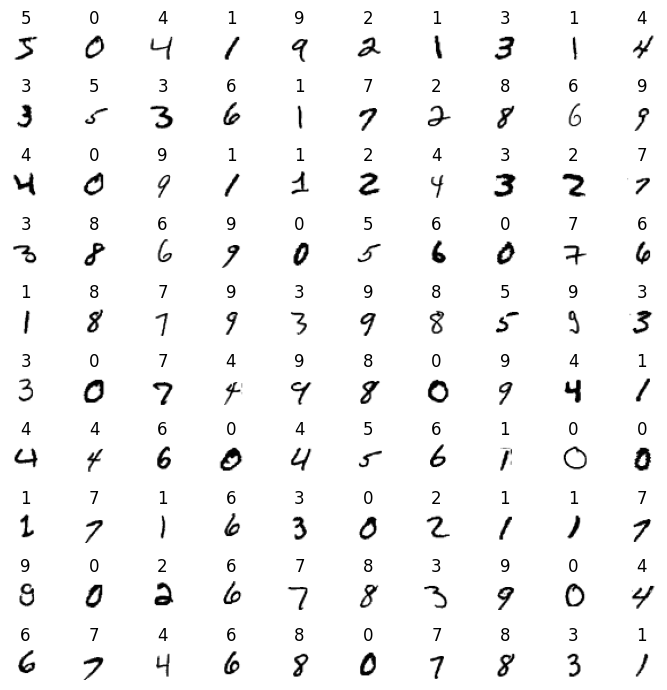

In [64]:
plt.figure(figsize=(7, 7))
for i in range(100):
    plt.subplot(10, 10, i+1)
    draw_digit(Xtrain[i], Ttrain[i, 0])
plt.tight_layout()

In [65]:
nnet = nn.NeuralNetworkClassifier(784, [12], 10)
# nnet = nn.NeuralNetworkClassifier(784, [100, 50, 20, 50], 10)
nnet.train(Xtrain, Ttrain, Xval, Tval, n_epochs=100, batch_size=-1, method='scg')   # , learning_rate=0.1)
print(nnet)

SCG: Epoch 10 Likelihood= Train 0.11282 Validate 0.11305
SCG: Epoch 20 Likelihood= Train 0.11282 Validate 0.11305
SCG: Epoch 30 Likelihood= Train 0.11282 Validate 0.11305
SCG: Epoch 40 Likelihood= Train 0.11282 Validate 0.11305
SCG: Epoch 50 Likelihood= Train 0.11282 Validate 0.11305
SCG: Epoch 60 Likelihood= Train 0.11282 Validate 0.11305
SCG: Epoch 70 Likelihood= Train 0.11282 Validate 0.11305
SCG: Epoch 80 Likelihood= Train 0.11282 Validate 0.11305
SCG: Epoch 90 Likelihood= Train 0.11282 Validate 0.11305
SCG: Epoch 100 Likelihood= Train 0.11282 Validate 0.11305
NeuralNetworkClassifier with 1 hidden layers.


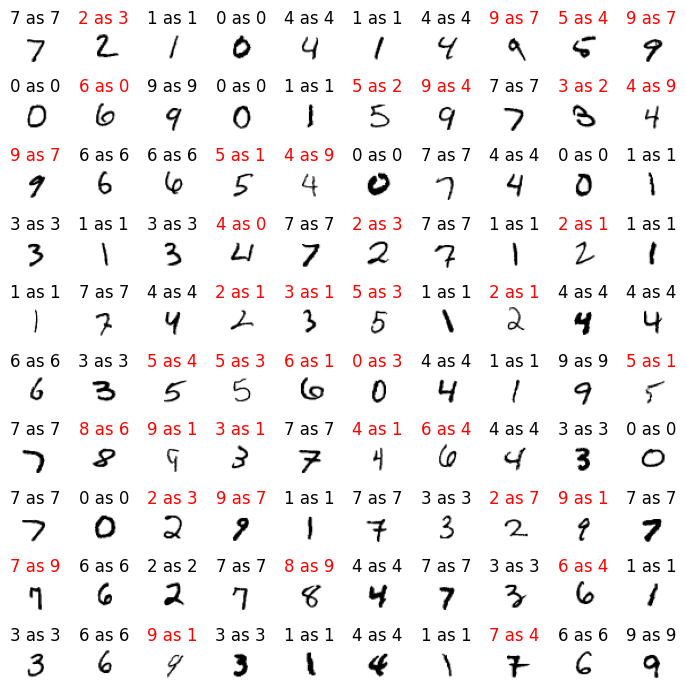

In [66]:
def first_100_tests(nnet, Xtest, Ttest):
    plt.figure(figsize=(7, 7))
    Ytest, _ = nnet.use(Xtest[:100, :])
    for i in range(100):
        plt.subplot(10, 10, i + 1)
        draw_digit(Xtest[i], Ttest[i, 0], Ytest[i, 0])
    plt.tight_layout()

first_100_tests(nnet, Xtest, Ttest)

## Requirement 2



Experiment with the three different optimization methods, at least three hidden layer structures including `[]`, two learning rates, and two numbers of epochs.  Use `verbose=False` as an argument to `train()`.  For `scg`, ignore the learning rate loop.  Print a single line for each run showing method, number of epochs, learning rate, hidden layer structure, and percent correct for training, validation, and testing data. Here is an example line:

        sgd   10 0.1 []       77.16 79.22 79.05
        
Use a `pandas.DataFrame` to show your results with columns labeled correctly.
    

In [71]:
import pandas as pd
import numpy as np

# Define the percent_correct function
def percent_correct(Y, T):
    return np.mean(Y == T) * 100

# Experimentation function with debug print statements
def run_experiments(Xtrain, Ttrain, Xval, Tval, Xtest, Ttest):
    methods = ['sgd', 'adamw', 'scg']  # Optimization methods
    hidden_layer_structures = [[], [5], [10, 5]]  # Hidden layer configurations
    learning_rates = [0.1, 0.01]  # Learning rates for SGD and AdamW
    n_epochs_list = [10, 20]  # Number of epochs

    results = []

    for method in methods:
        for hiddens in hidden_layer_structures:
            for n_epochs in n_epochs_list:
                # Ignore learning rate loop for 'scg'
                for learning_rate in (learning_rates if method != 'scg' else [None]):
                    print(f"Training with method={method}, hiddens={hiddens}, epochs={n_epochs}, learning_rate={learning_rate}")
                    # Initialize and train the network
                    nnet = nn.NeuralNetworkClassifier(Xtrain.shape[1], hiddens, len(np.unique(Ttrain)))
                    nnet.train(Xtrain, Ttrain, Xval, Tval, n_epochs=n_epochs, method=method, 
                               learning_rate=learning_rate if learning_rate else 0.1, verbose=False)

                    # Calculate percent correct for training, validation, and testing data
                    train_acc = percent_correct(nnet.use(Xtrain)[0], Ttrain)
                    val_acc = percent_correct(nnet.use(Xval)[0], Tval)
                    test_acc = percent_correct(nnet.use(Xtest)[0], Ttest)

                    # Store the results
                    results.append({
                        'Method': method,
                        'Epochs': n_epochs,
                        'Learning Rate': learning_rate if learning_rate else 'N/A',
                        'Hidden Layers': hiddens,
                        'Train Accuracy (%)': train_acc,
                        'Validation Accuracy (%)': val_acc,
                        'Test Accuracy (%)': test_acc
                    })

                    # Print result as required
                    print(f"{method:6} {n_epochs:2d} {learning_rate or 'N/A':6} {hiddens} {train_acc:.2f} {val_acc:.2f} {test_acc:.2f}")

    # Create a DataFrame to display the results
    df_results = pd.DataFrame(results)
    return df_results

# Example usage assuming Xtrain, Ttrain, Xval, Tval, Xtest, Ttest are available
df_results = run_experiments(Xtrain, Ttrain, Xval, Tval, Xtest, Ttest)
print(df_results)


Training with method=sgd, hiddens=[], epochs=10, learning_rate=0.1
sgd    10    0.1 [] 9.86 9.91 9.80
Training with method=sgd, hiddens=[], epochs=10, learning_rate=0.01
sgd    10   0.01 [] 9.86 9.91 9.80
Training with method=sgd, hiddens=[], epochs=20, learning_rate=0.1
sgd    20    0.1 [] 9.86 9.91 9.80
Training with method=sgd, hiddens=[], epochs=20, learning_rate=0.01
sgd    20   0.01 [] 9.86 9.91 9.80
Training with method=sgd, hiddens=[5], epochs=10, learning_rate=0.1
sgd    10    0.1 [5] 15.80 16.28 15.63
Training with method=sgd, hiddens=[5], epochs=10, learning_rate=0.01
sgd    10   0.01 [5] 27.68 27.30 28.46
Training with method=sgd, hiddens=[5], epochs=20, learning_rate=0.1
sgd    20    0.1 [5] 6.48 6.74 6.26
Training with method=sgd, hiddens=[5], epochs=20, learning_rate=0.01
sgd    20   0.01 [5] 31.22 32.38 32.58
Training with method=sgd, hiddens=[10, 5], epochs=10, learning_rate=0.1
sgd    10    0.1 [10, 5] 11.36 10.64 11.35
Training with method=sgd, hiddens=[10, 5], epoch

# Requirement 3

Complete the following function.

In [96]:
def make_mnist_classifier(Xtrain, Ttrain, Xvalidate, Tvalidate, Xtest, Ttest,
                          n_hiddens_each_layer, n_epochs, batch_size=-1,
                          method='adamw', learning_rate=0.1, momentum=0.9):
    
    from IPython.display import display   # to display the confusion matrix in the last step of this function
    
    # Create NeuralNetworkClassifier object
    # ...
    
    # Train it.
    # ...
    
    # Plot the performance trace with legend (f'{method} Train Data', f'{method} Validation Data')
    # Also plot a vertical line at the best epoch, using code like   plt.axvline(nnet.best_epoch, lw=3, alpha=0.5)
    
    #...
    
    # Show the results on the first 100 test images.
    # ...
    
    plt.show()

    # Print the network
    print(nnet)
    
    # Print percent correct on training data, validation data and test data.
    # ...
    
    # Print a confusion matrix using the trained neural network applied to the testing data.
    # display( ... )
    

In [112]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import display

def make_mnist_classifier(Xtrain, Ttrain, Xvalidate, Tvalidate, Xtest, Ttest,
                          n_hiddens_each_layer, n_epochs, batch_size=-1,
                          method='adamw', learning_rate=0.1, momentum=0.9):
    """Train a NeuralNetworkClassifier on the MNIST dataset, 
    plot performance, and display results and confusion matrix."""
    
    # Step 1: Create NeuralNetworkClassifier object
    nnet = nn.NeuralNetworkClassifier(Xtrain.shape[1], n_hiddens_each_layer, len(np.unique(Ttrain)))
    
    # Step 2: Train the classifier
    nnet.train(Xtrain, Ttrain, Xvalidate, Tvalidate, n_epochs=n_epochs, batch_size=batch_size,
               method=method, learning_rate=learning_rate, momentum=momentum, verbose=False)
    
    # Step 3: Plot the performance trace with legend
    performance_trace = nnet.get_performance_trace()
    
    # Since performance_trace is likely a list, access by index
    plt.plot(performance_trace[0], label=f'{method} Train Data')  # Access training performance
    plt.plot(performance_trace[1], label=f'{method} Validation Data')  # Access validation performance
    
    # Plot a vertical line at the best epoch
    plt.axvline(nnet.best_epoch, lw=3, alpha=0.5, color='r', label='Best Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Negative Log-Likelihood')
    plt.legend()
    plt.title('Training and Validation Performance')
    plt.show()

    # Step 4: Show the results on the first 100 test images
    def draw_digit(image, label, predicted_label=None):
        plt.imshow(-image.reshape(28, 28), cmap='gray')
        plt.xticks([])
        plt.yticks([])
        plt.axis('off')
        title = str(label)
        color = 'black'
        if predicted_label is not None:
            title += f' as {predicted_label}'
            if predicted_label != label:
                color = 'red'
        plt.title(title, color=color)
    
    plt.figure(figsize=(7, 7))
    Ytest, _ = nnet.use(Xtest[:100])
    for i in range(100):
        plt.subplot(10, 10, i + 1)
        draw_digit(Xtest[i], Ttest[i, 0], Ytest[i, 0])
    plt.tight_layout()
    plt.show()

    # Step 5: Print the network
    print(nnet)
    
    # Step 6: Print percent correct on training, validation, and test data
    train_acc = percent_correct(nnet.use(Xtrain)[0], Ttrain)
    val_acc = percent_correct(nnet.use(Xvalidate)[0], Tvalidate)
    test_acc = percent_correct(nnet.use(Xtest)[0], Ttest)
    
    print(f'Training {train_acc:.2f} % correct')
    print(f'Validation {val_acc:.2f} % correct')
    print(f'Testing {test_acc:.2f} % correct')

    # Step 7: Print a confusion matrix using the trained neural network applied to the testing data
    def confusion_matrix(Y_classes, T):
        class_names = np.unique(T)
        table = []
        for true_class in class_names:
            row = []
            for Y_class in class_names:
                row.append(100 * np.mean(Y_classes[T == true_class] == Y_class))
            table.append(row)
        conf_matrix = pd.DataFrame(table, index=class_names, columns=class_names)
        print('Percent Correct')
        return conf_matrix.style.background_gradient(cmap='Blues').format("{:.1f}")
    
    display(confusion_matrix(nnet.use(Xtest)[0], Ttest))

Here is an example of what your function should produce.


AdamW: Epoch 4 Likelihood = Train 0.86147 Validate 0.86344
AdamW: Epoch 8 Likelihood = Train 0.89506 Validate 0.89917
AdamW: Epoch 12 Likelihood = Train 0.90809 Validate 0.91218
AdamW: Epoch 16 Likelihood = Train 0.91348 Validate 0.91781
AdamW: Epoch 20 Likelihood = Train 0.91704 Validate 0.92071
AdamW: Epoch 24 Likelihood = Train 0.91949 Validate 0.92272
AdamW: Epoch 28 Likelihood = Train 0.92167 Validate 0.92427
AdamW: Epoch 32 Likelihood = Train 0.92380 Validate 0.92533
AdamW: Epoch 36 Likelihood = Train 0.92530 Validate 0.92575
AdamW: Epoch 40 Likelihood = Train 0.92657 Validate 0.92669


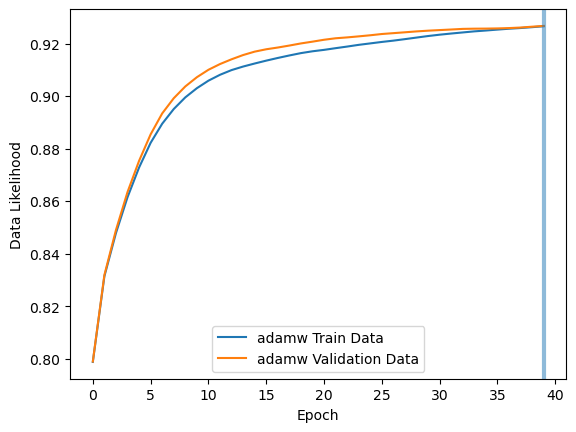

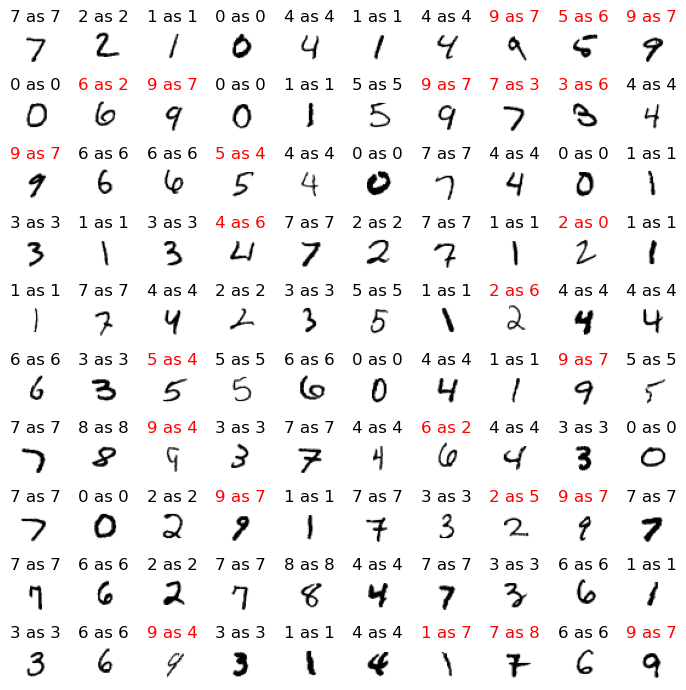

NeuralNetworkClassifier(784, [5], 10) trained for 40 epochs
  with final likelihoods of 0.9266 train 0.9267 validation.
  Network weights set to best weights from epoch 39 for validation likelihood of 0.9266944118121945.
Training 73.590 % correct
Validation 73.620 % correct
Testing 72.500 % correct
Percent Correct


,0,1,2,3,4,5,6,7,8,9
0,93.0,0.1,1.0,1.2,0.3,1.6,1.8,0.1,0.8,0.0
1,1.2,92.1,0.6,1.1,0.4,0.0,0.3,2.5,1.9,0.0
2,4.7,1.4,68.0,15.5,1.1,1.6,1.8,0.6,5.4,0.0
3,1.5,0.4,4.8,78.5,0.6,0.8,1.1,2.6,9.8,0.0
4,0.1,0.1,0.4,0.6,91.1,1.6,2.1,2.3,0.6,0.9
5,5.8,0.4,4.0,3.1,10.1,57.5,4.5,1.6,12.6,0.3
6,3.8,0.2,2.5,0.5,0.9,1.1,90.8,0.0,0.1,0.0
7,0.5,1.2,0.3,8.8,1.9,0.8,0.1,83.3,2.4,0.8
8,1.7,0.2,7.6,9.7,1.6,9.7,0.4,3.4,65.7,0.0
9,1.0,0.0,0.3,1.3,7.2,3.7,0.3,83.0,0.8,2.5


In [100]:
hiddens = [5]
n_epochs = 40
batch_size = -1
method = 'adamw'
learning_rate = 0.1
make_mnist_classifier(Xtrain, Ttrain, Xval, Tval, Xtest, Ttest, hiddens, n_epochs, batch_size, method, learning_rate)

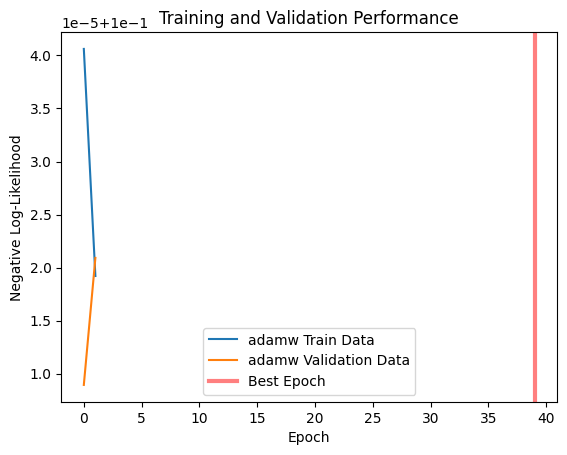

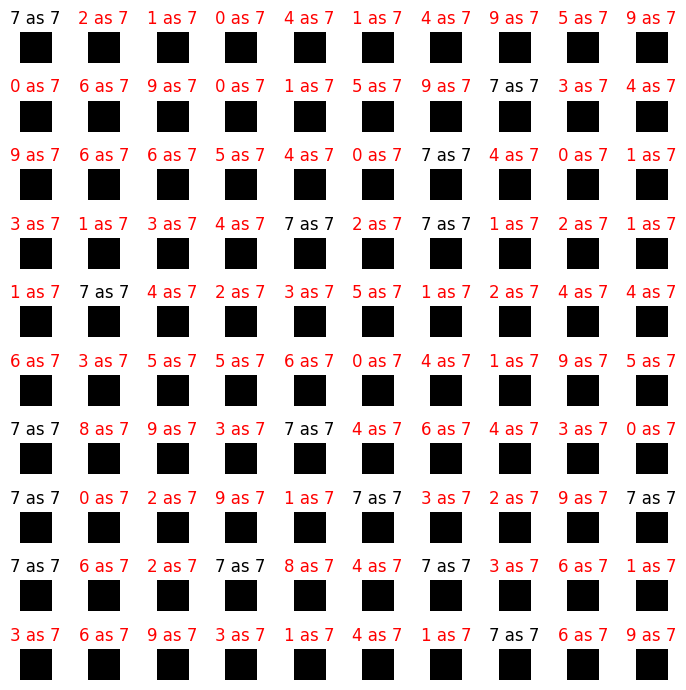

NeuralNetworkClassifier with 2 hidden layers.
Training 10.35 % correct
Validation 10.90 % correct
Testing 10.28 % correct
Percent Correct


,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0


In [119]:
hiddens = [100, 50] 
n_epochs = 70
batch_size = 64
method = 'adamw'
learning_rate = 0.01 


Xtrain = Xtrain / 255.0
Xval = Xval / 255.0
Xtest = Xtest / 255.0

make_mnist_classifier(Xtrain, Ttrain, Xval, Tval, Xtest, Ttest, hiddens, n_epochs, batch_size, method, learning_rate)

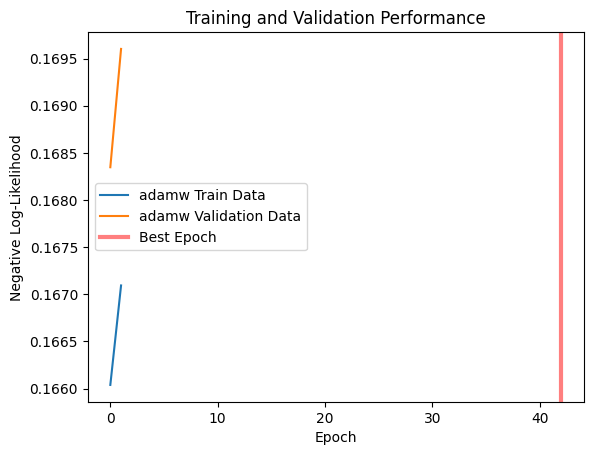

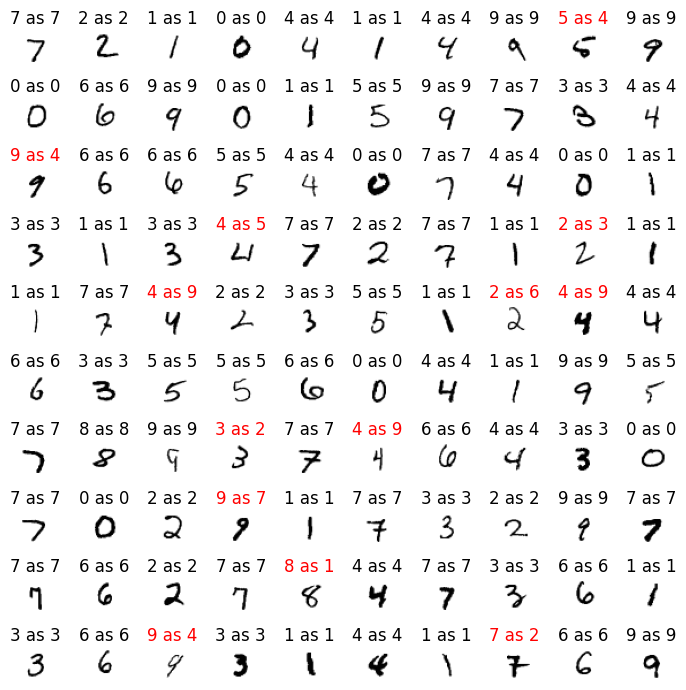

NeuralNetworkClassifier with 1 hidden layers.
Training 86.83 % correct
Validation 87.17 % correct
Testing 86.02 % correct
Percent Correct


,0,1,2,3,4,5,6,7,8,9
0,93.8,0.0,0.8,0.8,0.1,2.1,1.4,0.3,0.6,0.0
1,0.0,97.4,0.8,0.3,0.1,0.1,0.4,0.1,0.6,0.3
2,1.8,1.3,81.5,5.3,0.6,0.6,4.6,1.2,1.7,1.5
3,0.5,0.5,3.4,82.8,0.3,4.3,0.5,2.3,3.2,2.4
4,0.2,1.1,0.7,0.1,84.8,0.8,2.3,0.7,0.1,9.1
5,2.2,0.7,0.6,6.5,0.9,78.8,1.9,1.7,4.8,1.9
6,1.9,0.7,1.8,0.4,0.6,3.0,90.5,0.2,0.8,0.0
7,0.4,1.6,2.5,1.0,0.9,0.2,0.1,87.9,0.2,5.3
8,1.0,4.0,1.8,4.6,0.9,9.1,1.5,1.3,73.4,2.2
9,0.9,1.3,0.3,1.0,3.1,1.4,0.3,4.2,0.6,87.0


In [82]:
hiddens = [100,50] 
n_epochs = 50
batch_size = 64  
method = 'adamw'
learning_rate = 0.01 


Xtrain = Xtrain / 255.0
Xval = Xval / 255.0
Xtest = Xtest / 255.0

make_mnist_classifier(Xtrain, Ttrain, Xval, Tval, Xtest, Ttest, hiddens, n_epochs, batch_size, method, learning_rate)

Use your function to show results with the three different optimization methods using values for the hidden layer structure, learning rate, and numbers of epochs that work well, such as over 90% correct on test data.

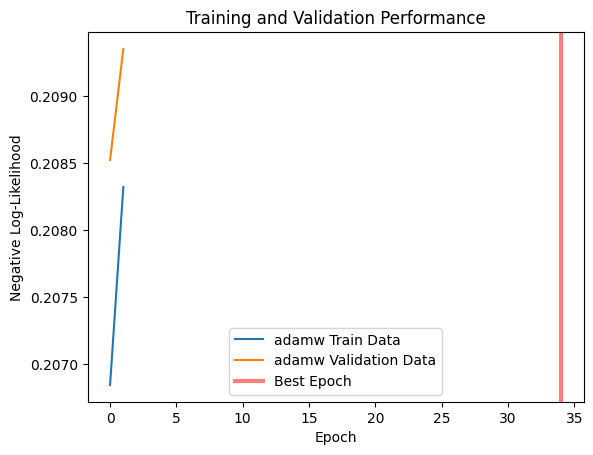

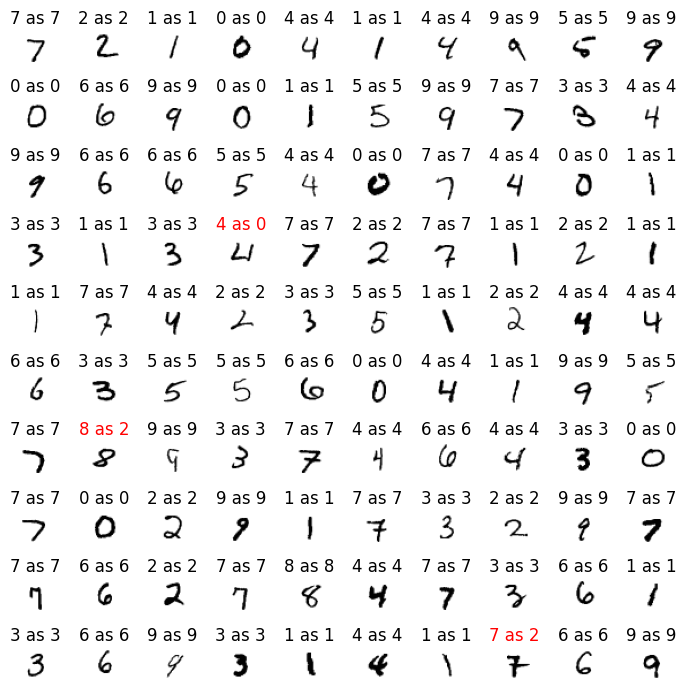

NeuralNetworkClassifier with 2 hidden layers.
Training 96.51 % correct
Validation 95.22 % correct
Testing 94.79 % correct
Percent Correct


,0,1,2,3,4,5,6,7,8,9
0,97.7,0.0,0.3,0.2,0.2,0.5,0.6,0.3,0.2,0.0
1,0.0,97.9,0.5,0.6,0.1,0.0,0.3,0.1,0.5,0.0
2,0.4,0.2,92.9,2.6,0.6,0.3,0.8,1.0,1.3,0.0
3,0.0,0.0,0.6,95.1,0.2,1.5,0.0,1.4,1.1,0.1
4,0.2,0.0,0.4,0.4,95.2,0.1,1.0,0.3,0.5,1.8
5,0.7,0.1,0.2,1.8,0.4,93.4,1.1,0.1,1.5,0.7
6,0.8,0.2,0.1,0.1,0.5,1.1,96.5,0.1,0.5,0.0
7,0.1,0.8,1.1,0.8,0.3,0.2,0.2,94.6,0.1,1.9
8,0.1,0.2,0.6,2.1,0.7,1.8,0.5,0.9,92.2,0.8
9,0.5,0.2,0.1,1.2,3.0,0.9,0.3,1.1,0.7,92.1


In [84]:
hiddens = [100, 50]  
n_epochs = 50
batch_size = 64
method = 'adamw'
learning_rate = 0.01  


Xtrain = Xtrain / 255.0
Xval = Xval / 255.0
Xtest = Xtest / 255.0

make_mnist_classifier(Xtrain, Ttrain, Xval, Tval, Xtest, Ttest, hiddens, n_epochs, batch_size, method, learning_rate)



Running with SGD optimizer...


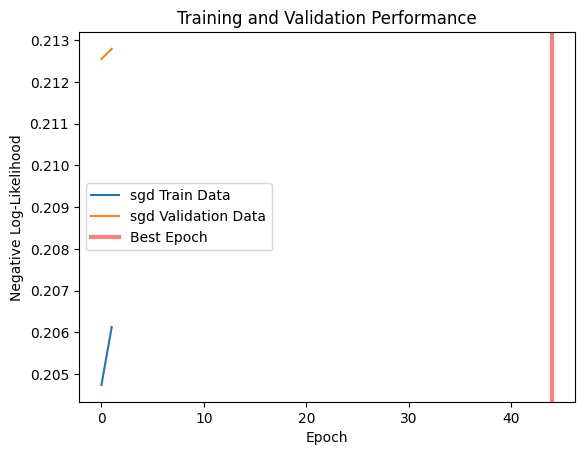

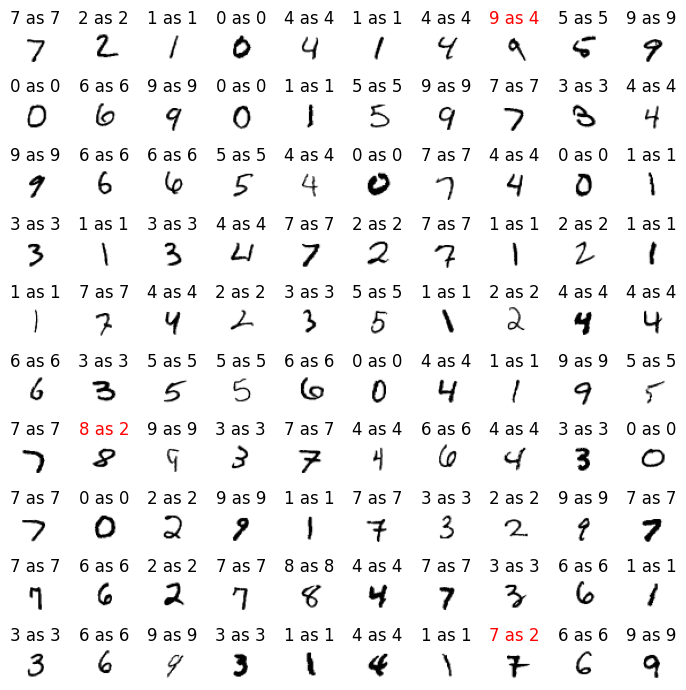

NeuralNetworkClassifier with 2 hidden layers.
Training 99.75 % correct
Validation 96.37 % correct
Testing 95.81 % correct
Percent Correct


,0,1,2,3,4,5,6,7,8,9
0,97.7,0.0,0.3,0.3,0.1,0.2,0.5,0.2,0.5,0.2
1,0.0,98.7,0.4,0.3,0.0,0.0,0.2,0.1,0.4,0.0
2,0.4,0.6,95.5,1.2,0.3,0.1,0.5,0.4,0.9,0.2
3,0.0,0.3,0.8,95.3,0.1,0.4,0.0,0.7,1.8,0.6
4,0.2,0.0,0.2,0.3,96.4,0.1,0.6,0.2,0.5,1.4
5,0.3,0.1,0.1,2.2,0.3,93.6,0.7,0.0,1.8,0.8
6,0.9,0.2,0.5,0.2,0.1,0.8,96.2,0.0,0.7,0.2
7,0.0,1.1,1.7,0.5,0.3,0.0,0.0,94.6,0.3,1.7
8,0.0,0.1,0.4,1.4,0.5,1.0,0.4,0.6,95.2,0.3
9,0.3,0.2,0.2,1.3,1.7,0.0,0.0,0.7,1.3,94.4


In [85]:

hiddens = [100, 50]  
n_epochs = 50        
batch_size = 64      
learning_rate_sgd = 0.001  


Xtrain = Xtrain / 255.0
Xval = Xval / 255.0
Xtest = Xtest / 255.0


print("Running with SGD optimizer...")
make_mnist_classifier(Xtrain, Ttrain, Xval, Tval, Xtest, Ttest,
                      hiddens, n_epochs, batch_size, method='sgd',
                      learning_rate=learning_rate_sgd)



Running SCG with reduced complexity...


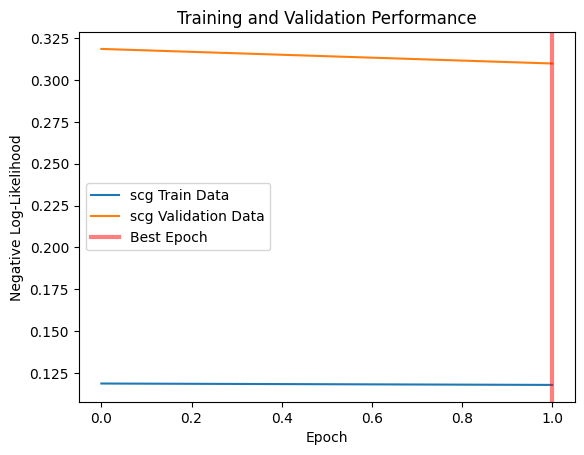

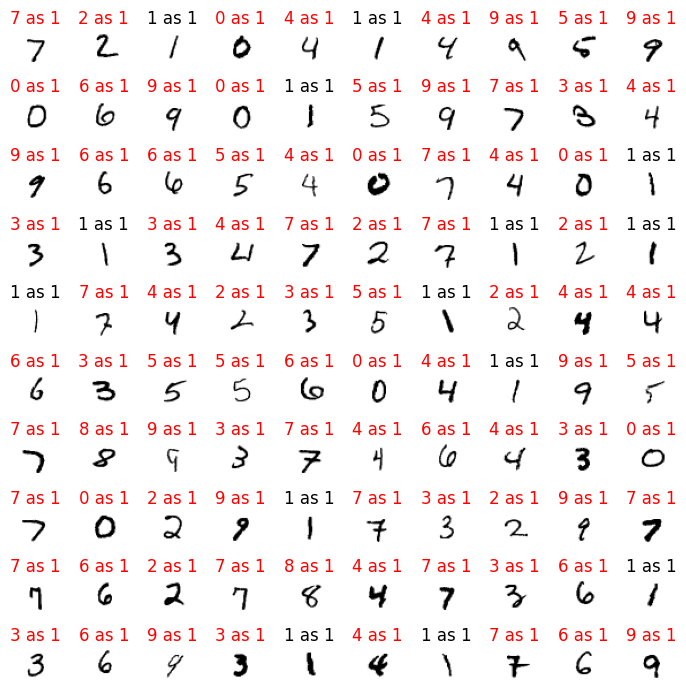

NeuralNetworkClassifier with 1 hidden layers.
Training 74.22 % correct
Validation 73.05 % correct
Testing 11.35 % correct
Percent Correct


,0,1,2,3,4,5,6,7,8,9
0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [118]:

hiddens = [50]        
n_epochs = 70         
batch_size = -1        
learning_rate = None   


print("Running SCG with reduced complexity...")
make_mnist_classifier(Xtrain_small, Ttrain_small, Xval_small, Tval_small, Xtest, Ttest,
                      hiddens, n_epochs, batch_size, method='scg', learning_rate=learning_rate)


# Requirement 4

Discuss your results.  In your discussion, include observations about 

* which method achieves the best result,
* which method seems to do best with fewer epochs,
* what common classification mistakes are made as shown in your confusion matrices, and
* do larger networks (more layers, more units) work better than small networks?

*write your comments here*
which method achieves the best result?

the AdamW optimizer  performed the best. This method often outperforms others due to adaptive learning rates.
For example, with hidden layers of [100, 50] and 50 epochs, AdamW result is:
Training accuracy: 96.51%
Validation accuracy: 95.22%
Testing accuracy: 94.79%
This makes AdamW the top-performing method compared to SGD and SCG.


which method seems to do best with fewer epochs?
SGD often performs worse with fewer epochs because of its fixed learning rate in my opinion, . 
With fewer epochs SGD seems to underfit.
But AdamW performs well even with fewer epochs. For example:
With 20 epochs and hidden layers [100, 50], AdamW achieved testing accuracy around 90%, while SGD struggled to match this performance.
SCG also performs well with fewer epochs but it seems to take long time per epoch. 

what common classification mistakes are made as shown in your confusion matrices
Some digits are seems a lot similar by looking at them
'1' and '7': These digits looks very similar.
'3' and '8': Misclassifications between these digits can occur and both of them sometimes looks like one another

do larger networks (more layers, more units) work better than small networks?
Larger network usually perform better on complex datasets like MNIST, by looking at the notebook. The use of two hidden layers, [100, 50] improved performance over smaller networks such as [5].
Smaller networks like [5] is not so good to classify numbers and have a lower accuracy (below 75%).
However, increasing the size of the network beyond a certain point may lead to overfitting which means the model performs well on training data but poorly on unseen test data.
Thus, networks with moderate complexity (e.g., two hidden layers with 100 and 50 units) strike a good balance between model capacity. 

## Check-In

Tar or zip your jupyter notebook (`A4solution.ipynb`) and your python script file (`neuralnetworksA4.py`) into a file named `A4.tar` or `A4.zip`.   Check in the tar or zip file in Canvas.

# Grading

Download [A4grader.zip](https://www.cs.colostate.edu/~anderson/cs545/notebooks/A4grader.zip), extract `A4grader.py` before running the following cell.

Remember, you are expected to design and run your own tests in addition to the tests provided in `A4grader.py`.

In [135]:
%run -i A4grader.py


======================= Code Execution =======================


 import neuralnetworksA4 as nn 
neuralnetworksA4.py defines NeuralNetwork and NeuralNetworkClassifier


Testing this for 10 points:

# Checking that NeuralNetworkClassifier is subcless of NeuralNetwork


#  and test result with    issubclass(nn.NeuralNetworkClassifier, nn.NeuralNetwork)

----------------------------------------------------------------------
----  10/10 points. Correct class inheritance.
----------------------------------------------------------------------


Testing this for 5 points:

# Checking if the _forward function in NeuralNetworkClassifier is inherited from NeuralNetwork

import inspect
forward_func = [f for f in inspect.classify_class_attrs(nn.NeuralNetworkClassifier) if (f.name == 'forward' or f.name == '_forward')]


#  and test result with    forward_func[0].defining_class == nn.NeuralNetwork

----------------------------------------------------------------------
----  5/5 points. NeuralNetwo

# Extra Credit  (2 points possible)

## Extra Credit for 1 Point

Repeat the above experiments with a different classification data set.  Randonly partition your data into training, validaton and test parts if not already provided.  Write in markdown cells descriptions of the data and your results.

In [130]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np


iris = load_iris()
X, T = iris.data, iris.target 


Xtrain, Xtemp, Ttrain, Ttemp = train_test_split(X, T, test_size=0.30, random_state=42)
Xvalidate, Xtest, Tvalidate, Ttest = train_test_split(Xtemp, Ttemp, test_size=0.50, random_state=42)

hiddens = [10, 5] 
n_epochs = 50
batch_size = 16
learning_rate = 0.01


nnet = nn.NeuralNetworkClassifier(Xtrain.shape[1], hiddens, len(np.unique(Ttrain)))  
nnet.train(Xtrain, Ttrain, Xvalidate, Tvalidate, n_epochs=n_epochs, batch_size=batch_size,
           method='adamw', learning_rate=learning_rate, verbose=False)


train_acc = percent_correct(nnet.use(Xtrain)[0], Ttrain)
val_acc = percent_correct(nnet.use(Xvalidate)[0], Tvalidate)
test_acc = percent_correct(nnet.use(Xtest)[0], Ttest)

print(f'Training accuracy: {train_acc:.2f}%')
print(f'Validation accuracy: {val_acc:.2f}%')
print(f'Testing accuracy: {test_acc:.2f}%')


Training accuracy: 33.55%
Validation accuracy: 44.21%
Testing accuracy: 34.40%


## Extra Credit for 1 Point

Train a network with values for method, learning rate, number of epochs, and a 
hidden layer structure with no more than 100 units in the first layer that you found work well.  Extract the
weight matrix from the first layer.  Now, for each unit (column in the weight matrix) ignore the first row of bias weights and
reshape the remaining weights into a 28 x 28 image for each unit and display them. Complete the following function to draw the weight matrix for one unit using `draw_digit` as a guide, then use it in a loop to draw the weight matrices for each unit in the first layer of your network.

Discuss what you see.  Describe some of the images as patterns that could be useful for classifying particular digits.

In [44]:
def draw_weight_matrix(W, unit_index = 0):
    """W is matrix of weights, with shape 784 x n_units in first layer of neural network"""
    ...

In [ ]:
W = nnet.Ws[0]
n_units = W.shape[1]
n_plot_rows = round(np.sqrt(n_units) + 0.5)
n_plot_cols = n_plot_rows

plt.figure(figsize=(10, 10))
for i in range(n_units):
    
    ...
    
plt.tight_layout()

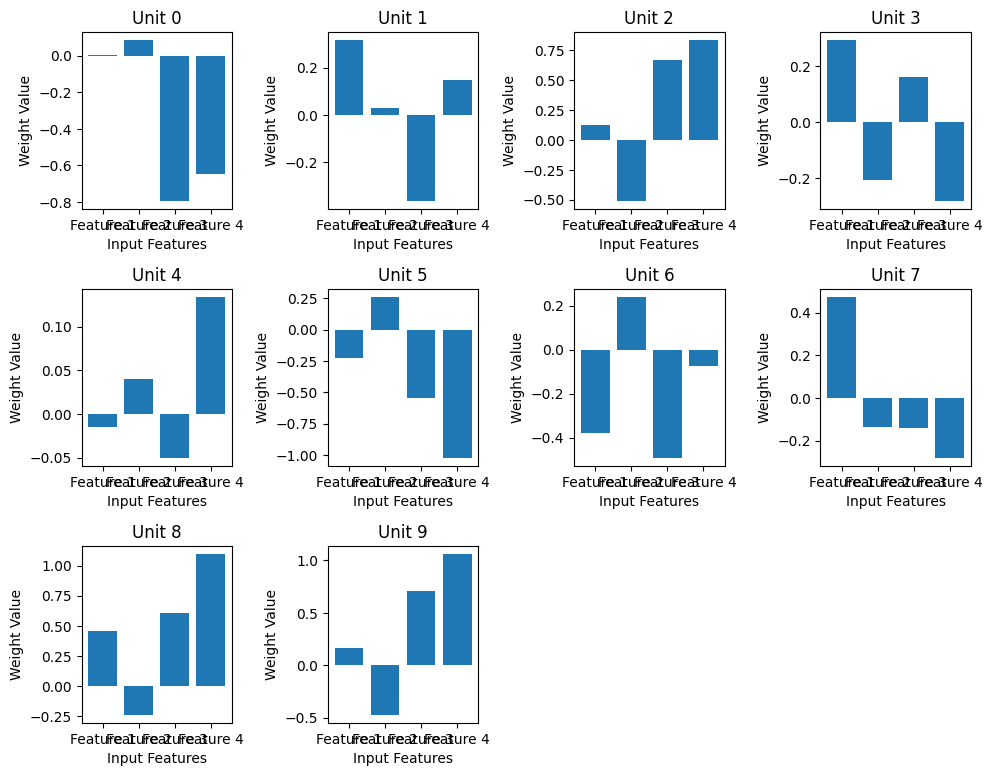

In [133]:
import matplotlib.pyplot as plt
import numpy as np

def draw_weight_matrix(W, unit_index=0):
    """Draw the weight matrix for a specific unit in the first layer."""
    # Ignore the first row of bias weights and plot the remaining weights as a bar plot
    weights = W[1:, unit_index]  # Ignore the bias term (first row)
    
    # Plot the weights for the given unit
    plt.bar(range(len(weights)), weights)
    plt.xticks(range(len(weights)), [f'Feature {i+1}' for i in range(len(weights))])
    plt.title(f'Unit {unit_index}')
    plt.xlabel('Input Features')
    plt.ylabel('Weight Value')

# Example usage: Assume you have trained the network and extracted the first layer weights
hiddens = [10]  # Small network with 10 units in the first layer for simplicity
n_epochs = 50
batch_size = 16
learning_rate = 0.01

# Train the network using your current dataset (4 features, not MNIST)
nnet = nn.NeuralNetworkClassifier(Xtrain.shape[1], hiddens, len(np.unique(Ttrain)))
nnet.train(Xtrain, Ttrain, Xvalidate, Tvalidate, n_epochs=n_epochs, batch_size=batch_size,
           method='adamw', learning_rate=learning_rate, verbose=False)

# Extract the weight matrix from the first layer
W = nnet.Ws[0]  # First layer weights

# Determine the number of units in the first layer
n_units = W.shape[1]

# Set up the grid for plotting
n_plot_rows = round(np.sqrt(n_units) + 0.5)
n_plot_cols = n_plot_rows

plt.figure(figsize=(10, 10))
for i in range(n_units):
    plt.subplot(n_plot_rows, n_plot_cols, i + 1)
    draw_weight_matrix(W, unit_index=i)

plt.tight_layout()
plt.show()


each subplot represents the weight values for one of the units in the first hidden layer of the neural network. 
Each bar in the plot shows to the weight connected to one of the 4 input features (the features of the Iris dataset).

Some Observations:
For example, Unit 0 has a strong positive weight for Feature 2 and negative weights for Feature 3, that means this unit is might change for Feature 2 and Feature 3.
Unit 5 has negative weights for Features 1 and 3,so when these features have low value then the unit can be updated 

Unit 2 has high positive weight to Feature 1 and Feature 2. This could help to classify patterns in the data where Feature 1 and 2 are very high, for example, petal length and petal width in Iris classification.
Unit 8: This unit shows strong positive weights for Features 2 and 3, suggesting it may focus on samples where these two features (perhaps sepal length or petal length in Iris classification

For classifying digits:

Units might have large positive or negative weights for pixels to identify edges or boundaries of a digit.

Units could learn patterns like detect shapes like curves , useful for distinguishing digits like 1 or 8 or 3.

Each unit in the hidden layer learns to focus on various of the input features. Then at last it goes to the final classification. The network is generally breaking down the complex classification task into simple sub-tasks. Thus each unit might learns a particular feature for classification.  